In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Visualization
* [Official description and data](https://tianchi.aliyun.com/competition/information.htm?spm=5176.11165261.5678.2.585423ebZpjaY4&raceId=231648)

In [8]:
import os
import sys
sys.path.append('..')

import pandas as pd
pd.options.display.max_columns = 100

from utils.config import opt
import utils.plot as plot

Here are the list of keypoint categories:

In [9]:
plot.num_kp_categories

['armpit_left',
 'armpit_right',
 'bottom_left_in',
 'bottom_left_out',
 'bottom_right_in',
 'bottom_right_out',
 'center_front',
 'crotch',
 'cuff_left_in',
 'cuff_left_out',
 'cuff_right_in',
 'cuff_right_out',
 'hemline_left',
 'hemline_right',
 'neckline_left',
 'neckline_right',
 'shoulder_left',
 'shoulder_right',
 'top_hem_left',
 'top_hem_right',
 'waistband_left',
 'waistband_right',
 'waistline_left',
 'waistline_right']

In [26]:
plot.idx2kp

{0: 'armpit_left',
 1: 'armpit_right',
 2: 'bottom_left_in',
 3: 'bottom_left_out',
 4: 'bottom_right_in',
 5: 'bottom_right_out',
 6: 'center_front',
 7: 'crotch',
 8: 'cuff_left_in',
 9: 'cuff_left_out',
 10: 'cuff_right_in',
 11: 'cuff_right_out',
 12: 'hemline_left',
 13: 'hemline_right',
 14: 'neckline_left',
 15: 'neckline_right',
 16: 'shoulder_left',
 17: 'shoulder_right',
 18: 'top_hem_left',
 19: 'top_hem_right',
 20: 'waistband_left',
 21: 'waistband_right',
 22: 'waistline_left',
 23: 'waistline_right'}

In [27]:
plot.kp2idx

{'armpit_left': 0,
 'armpit_right': 1,
 'bottom_left_in': 2,
 'bottom_left_out': 3,
 'bottom_right_in': 4,
 'bottom_right_out': 5,
 'center_front': 6,
 'crotch': 7,
 'cuff_left_in': 8,
 'cuff_left_out': 9,
 'cuff_right_in': 10,
 'cuff_right_out': 11,
 'hemline_left': 12,
 'hemline_right': 13,
 'neckline_left': 14,
 'neckline_right': 15,
 'shoulder_left': 16,
 'shoulder_right': 17,
 'top_hem_left': 18,
 'top_hem_right': 19,
 'waistband_left': 20,
 'waistband_right': 21,
 'waistline_left': 22,
 'waistline_right': 23}

Let's ramdomly sample 9 images from training set

In [34]:
img_dirs = ['wu_train', 'r1_train', 'r1_test_a', 'r1_test_b', 'r2_test_a', 'r2_test_b']
dir_path = opt.db_path / img_dirs[0]
df = pd.read_csv(dir_path / 'Annotations/annotations.csv') 
samples = df.sample(n=9)
samples

,image_id,image_category,neckline_left,neckline_right,center_front,shoulder_left,shoulder_right,armpit_left,armpit_right,waistline_left,waistline_right,cuff_left_in,cuff_left_out,cuff_right_in,cuff_right_out,top_hem_left,top_hem_right,waistband_left,waistband_right,hemline_left,hemline_right,crotch,bottom_left_in,bottom_left_out,bottom_right_in,bottom_right_out
744,Images/blouse/ecdbc20aa2318374509be785415ceb19...,blouse,124_71_1,237_76_1,184_109_1,64_109_1,296_112_1,75_250_1,266_248_0,-1_-1_-1,-1_-1_-1,72_469_1,17_464_1,298_461_1,350_458_1,88_358_0,273_352_0,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1
5548,Images/outwear/f4bcc66242c06e61d6752a23a9a8e87...,outwear,256_86_0,306_83_1,-1_-1_-1,221_98_0,346_104_1,212_158_0,305_164_0,-1_-1_-1,-1_-1_-1,254_207_1,235_237_1,226_233_0,227_269_1,188_479_1,331_490_1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1
11890,Images/trousers/7b078b0e0953dbd2abd76c0a7c9cda...,trousers,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,203_215_0,290_219_0,-1_-1_-1,-1_-1_-1,248_308_1,222_455_1,186_463_1,249_472_1,288_476_1
5612,Images/outwear/1d7166f91ca7c6de3f22f3d1d12f7cf...,outwear,193_100_1,255_88_1,-1_-1_-1,170_146_1,293_109_1,190_193_1,298_166_1,-1_-1_-1,-1_-1_-1,197_245_1,188_273_1,306_232_1,326_251_1,222_479_1,386_448_1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1
12529,Images/trousers/11b328b8b5542d05c292778b72f543...,trousers,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,184_42_1,318_42_1,-1_-1_-1,-1_-1_-1,247_210_1,215_476_1,63_435_1,304_481_1,455_431_1
8719,Images/dress/6d64806ffb05bc44f56e847adef7d8f5.jpg,dress,304_11_1,373_28_1,315_91_1,248_13_1,419_55_1,240_92_0,385_127_1,220_179_1,355_209_1,234_152_0,193_135_1,369_193_1,424_177_1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,29_347_1,381_491_1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1
11109,Images/trousers/a36816a6faafe0107eb6a85901e579...,trousers,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,212_70_0,325_62_0,-1_-1_-1,-1_-1_-1,273_153_1,279_310_1,243_320_1,325_349_1,359_342_1
1225,Images/blouse/eb3869a5c76bdfcef6303359f6d25d11...,blouse,210_119_1,287_120_1,252_136_1,177_135_1,325_133_1,195_193_1,315_185_1,-1_-1_-1,-1_-1_-1,190_235_1,157_226_1,315_213_1,340_205_1,184_295_1,320_305_1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1
7570,Images/dress/4ca6a956115550f18f6b9c0b515e49f0.jpg,dress,189_76_1,312_75_1,254_151_1,173_82_1,330_85_1,177_174_1,328_173_1,179_267_1,326_261_1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,166_508_1,343_511_1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1


['Images/blouse/ecdbc20aa2318374509be785415ceb19.jpg', 'Images/outwear/f4bcc66242c06e61d6752a23a9a8e870.jpg', 'Images/trousers/7b078b0e0953dbd2abd76c0a7c9cdae8.jpg', 'Images/outwear/1d7166f91ca7c6de3f22f3d1d12f7cf5.jpg', 'Images/trousers/11b328b8b5542d05c292778b72f5438d.jpg', 'Images/dress/6d64806ffb05bc44f56e847adef7d8f5.jpg', 'Images/trousers/a36816a6faafe0107eb6a85901e579bd.jpg', 'Images/blouse/eb3869a5c76bdfcef6303359f6d25d11.jpg', 'Images/dress/4ca6a956115550f18f6b9c0b515e49f0.jpg']


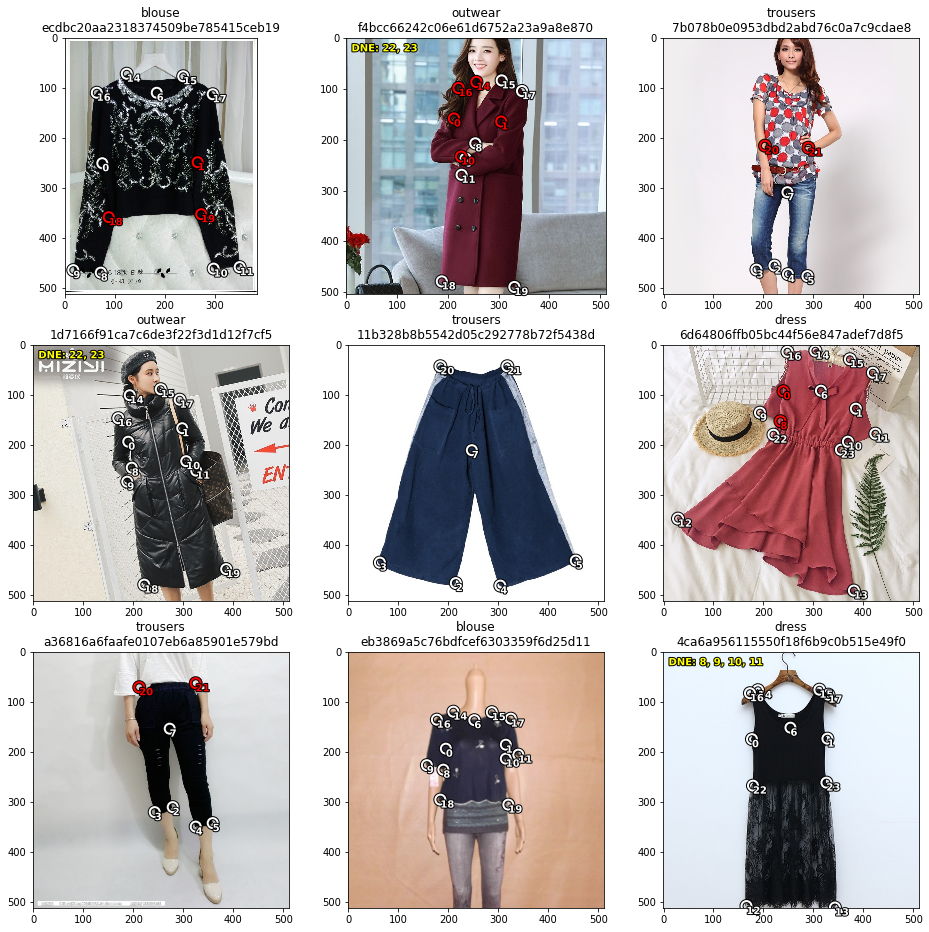

In [35]:
plot.plot_img_with_kps(dir_path, samples)

To check the name from the keypoint index use `plot.idx2kp`:

In [36]:
plot.idx2kp[20]

'waistband_left'

You can also check individual image:

,neckline_left,neckline_right,center_front,shoulder_left,shoulder_right,armpit_left,armpit_right,waistline_left,waistline_right,cuff_left_in,cuff_left_out,cuff_right_in,cuff_right_out,hemline_left,hemline_right
8132,208_25_1,306_27_1,261_58_1,179_36_1,339_39_1,190_116_0,329_111_0,-1_-1_-1,-1_-1_-1,180_152_1,140_112_1,338_149_1,382_116_1,81_405_1,366_474_1


['Images/dress/f14fd746a2e379e6f3a127fb68f967e9.jpg']


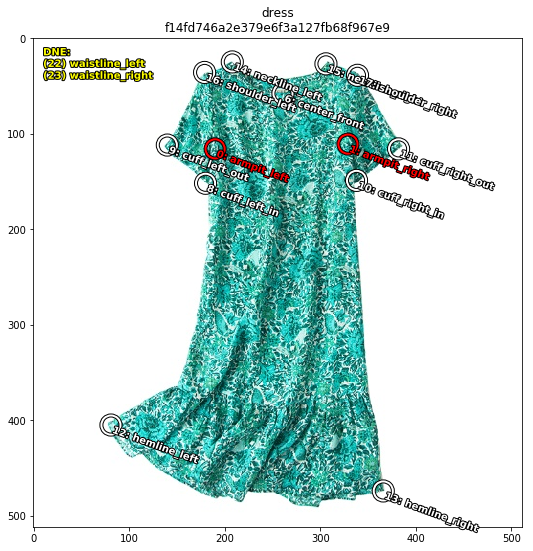

In [37]:
plot_img_by_id(dir_path, df, 'f14fd746a2e379e6f3a127fb68f967e9')

,neckline_left,neckline_right,center_front,shoulder_left,shoulder_right,armpit_left,armpit_right,waistline_left,waistline_right,cuff_left_in,cuff_left_out,cuff_right_in,cuff_right_out,hemline_left,hemline_right
8732,164_19_0,232_18_1,202_34_1,141_32_1,260_33_1,167_61_0,247_65_1,167_126_1,239_126_1,-1_-1_-1,-1_-1_-1,-1_-1_-1,-1_-1_-1,131_388_1,254_396_1


['Images/dress/1f70b09e4abde577a750fa9c373629d6.jpg']


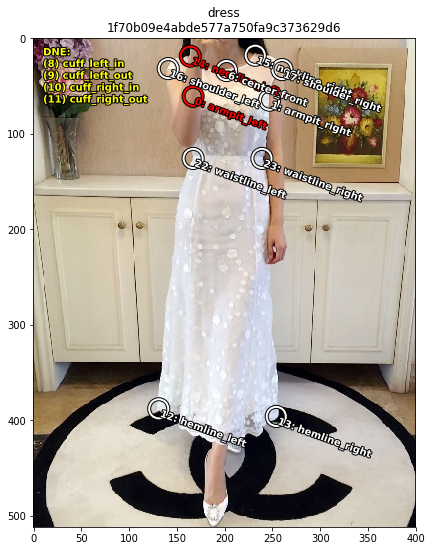

In [38]:
plot_img_by_id(dir_path, df, '1f70b09e4abde577a750fa9c373629d6')